In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits

from gmagaox.math_module import xp, _scipy, ensure_np_array
import gmagaox.gmagaox as gmagaox
from gmagaox import optics
from gmagaox import utils
from gmagaox.imshows import *

from importlib import reload

import poppy

In [2]:
display(optics.distances['ifp8.157_Roap1'])
display(optics.distances['Roap1_fm1'] + optics.distances['fm1_fsm-pp'])
display(optics.focal_lengths['Roap1'])

<Quantity 130.38196123 mm>

<Quantity 131.10798718 mm>

<Quantity 130.38196123 mm>

In [3]:
reload(optics)
display(optics.distances['fsm-pp_fm2'] + optics.distances['fm2_Roap2'])
display(optics.distances['Roap2_fm3'] + optics.distances['fm3_ifp14'])
display(optics.focal_lengths['Roap2'])

<Quantity 230.87708641 mm>

<Quantity 223.95033089 mm>

<Quantity 223.95033 mm>

In [4]:
reload(optics)
display(optics.distances['ifp14_km1'] + optics.distances['km1_km2'] + \
        optics.distances['km2_km3'] + optics.distances['km3_fm4'] + \
        optics.distances['fm4_AOoap1'])
display(optics.distances['AOoap1_fm5'] + optics.distances['fm5_ADC-pp'])
display(optics.focal_lengths['AOoap1'])

<Quantity 700.54127407 mm>

<Quantity 700.54126714 mm>

<Quantity 700.54127 mm>

In [82]:
700.54127-663.3798

37.16147000000001

In [5]:
reload(optics)
display(optics.distances['ADC-pp_fm6'] + optics.distances['fm6_fm7'] + \
        optics.distances['fm7_AOoap2'])
display(optics.distances['AOoap2_ifp8.157'])
display(optics.focal_lengths['AOoap2'])

<Quantity 407.46200427 mm>

<Quantity 407.46198135 mm>

<Quantity 407.4637211 mm>

In [95]:
425.4287- 407.46198

17.96672000000001

In [6]:
reload(optics)
display(optics.distances['ifp8.157_fm8'] + optics.distances['fm8_AOoap3'] )
display(optics.distances['AOoap3_woofer-pp'])
display(optics.focal_lengths['AOoap3'])

<Quantity 705.72576702 mm>

<Quantity 634.6731312 mm>

<Quantity 705.72577 mm>

Propagating wavelength 650.000 nm.
PSF calculated in 0.319s


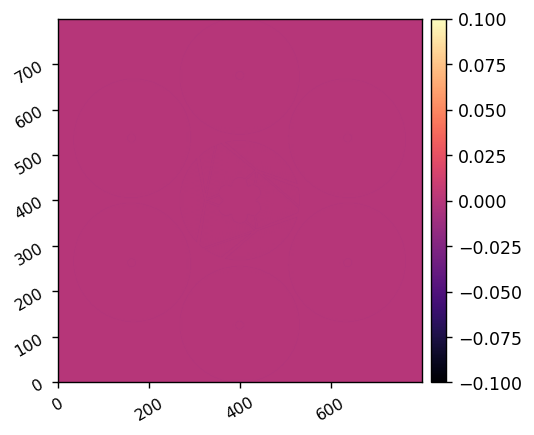

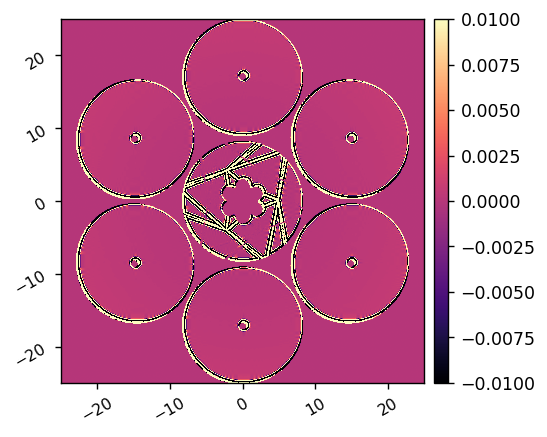

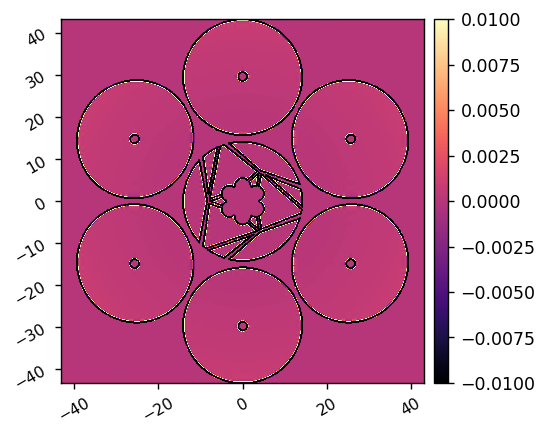

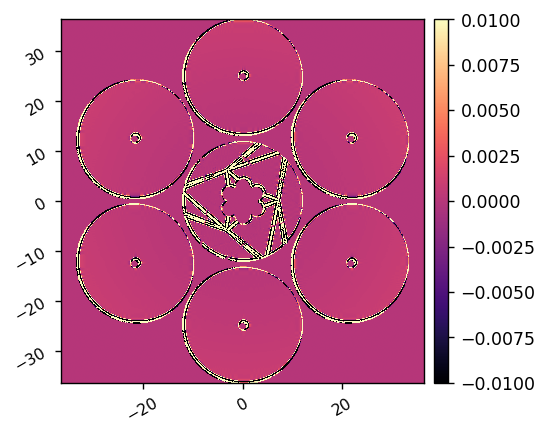

In [17]:
reload(optics)
reload(gmagaox)

model = gmagaox.MODEL(npix=800, oversample=4)
# model.fsm_correction = -1*u.mm

model.ADCpp_correction = 0*u.mm

model.ifp8157_1_correction = 0.01059320*u.mm
model.ifp14_correction = -0.00011966*u.mm
model.ifp8157_2_correction = 0.00173228*u.mm
model.ifp15_correction = 0.10906065*u.mm
model.ifp15_2_correction = -0.00004823*u.mm

wfs = model.calc_wfs()

fsm_index = 7
phs = utils.pad_or_crop(wfs[fsm_index].phase, model.npix)
imshow1(phs*model.pupil_mask, vmin=-0.1, vmax=0.1)

adc_index = 18
phs = utils.pad_or_crop(wfs[adc_index].phase, model.npix)
imshow1(phs*model.pupil_mask, vmin=-0.01, vmax=0.01, pxscl=wfs[adc_index].pixelscale.to(u.mm/u.pix))

woofer_index = 25
phs = utils.pad_or_crop(wfs[woofer_index].phase, model.npix)
imshow1(phs*model.pupil_mask, vmin=-0.01, vmax=0.01, pxscl=wfs[woofer_index].pixelscale.to(u.mm/u.pix))

tweeter_index = 31
phs = utils.pad_or_crop(wfs[tweeter_index].phase, model.npix)
imshow1(phs*model.pupil_mask, vmin=-0.01, vmax=0.01, pxscl=wfs[tweeter_index].pixelscale.to(u.mm/u.pix))



Pupil Diameter: 72.88630068727906 mm


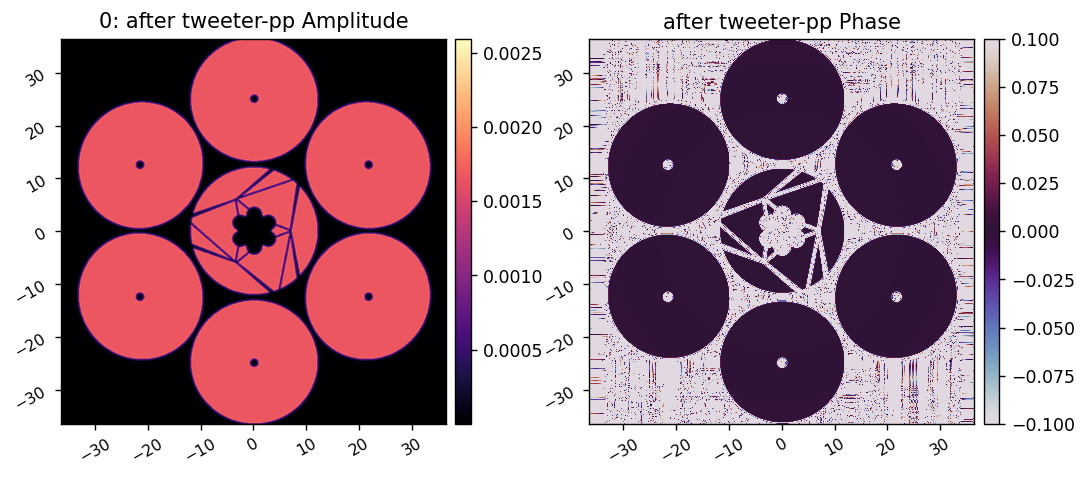

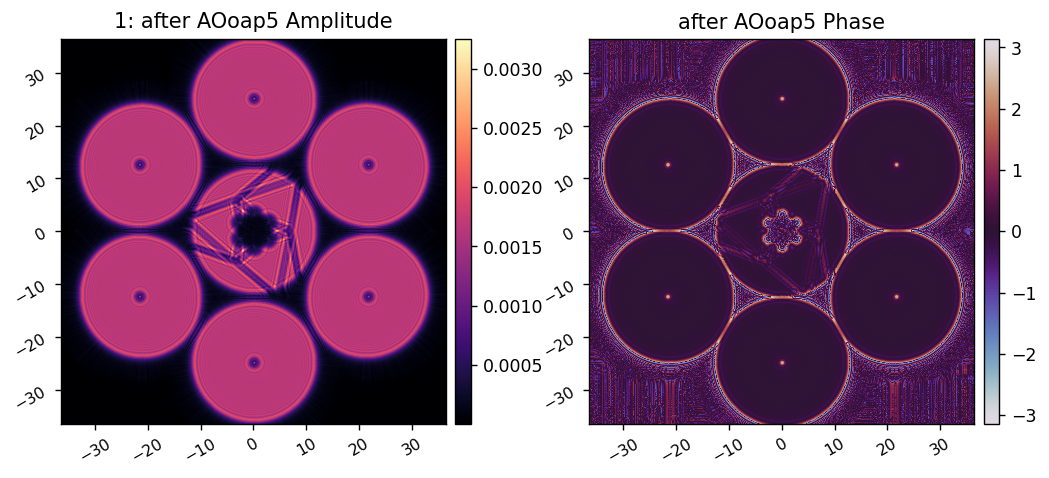

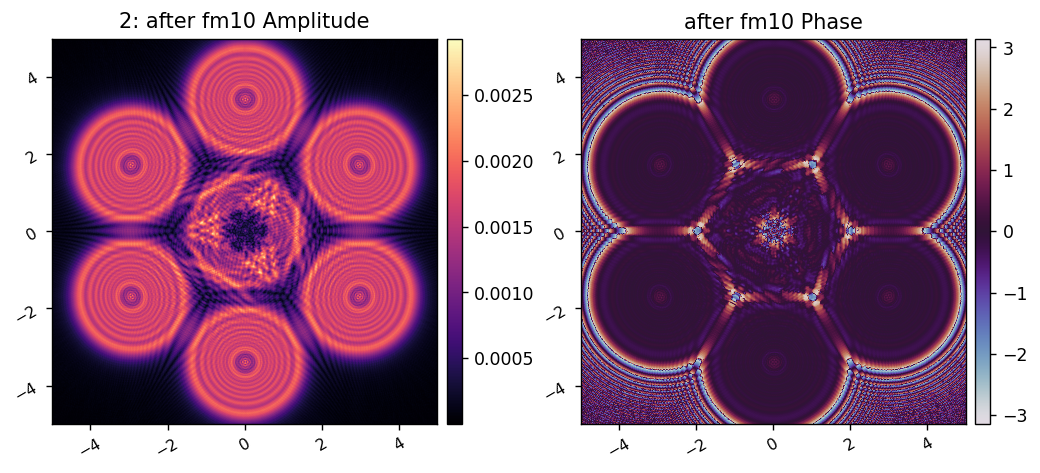

Correction distance: 0.00000000 mm


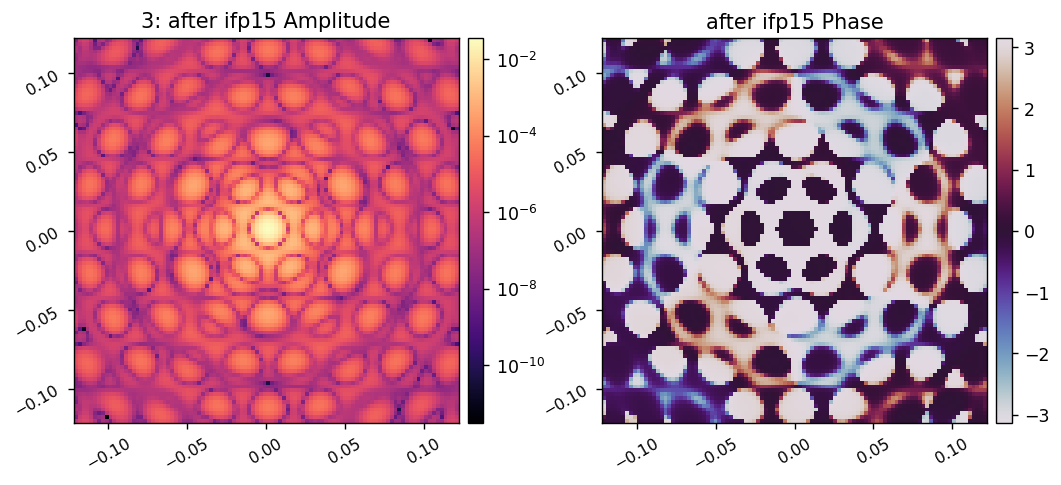

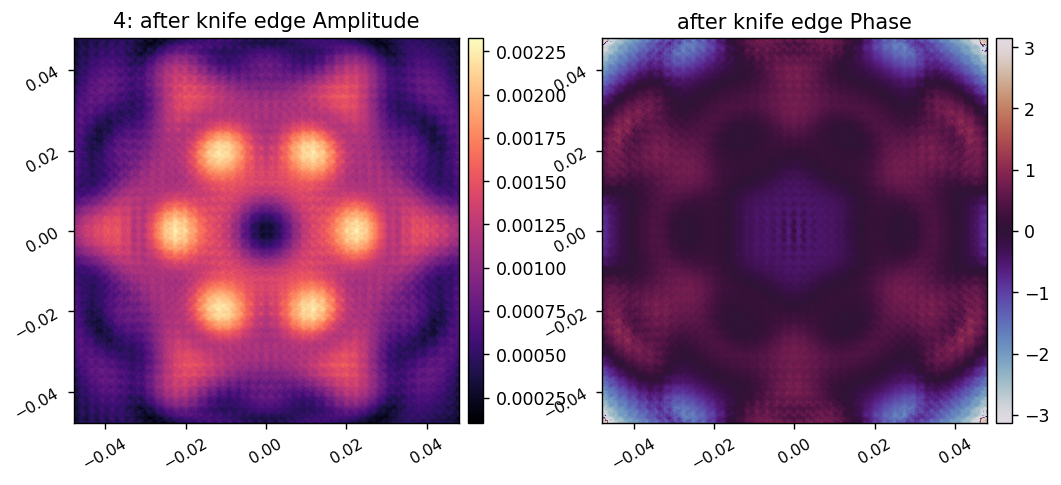

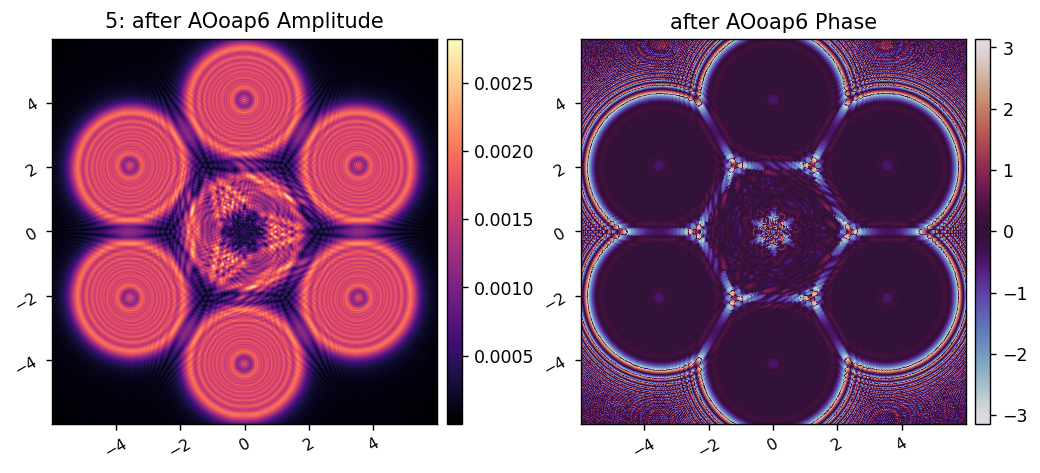

Correction distance: -72.71665231 mm


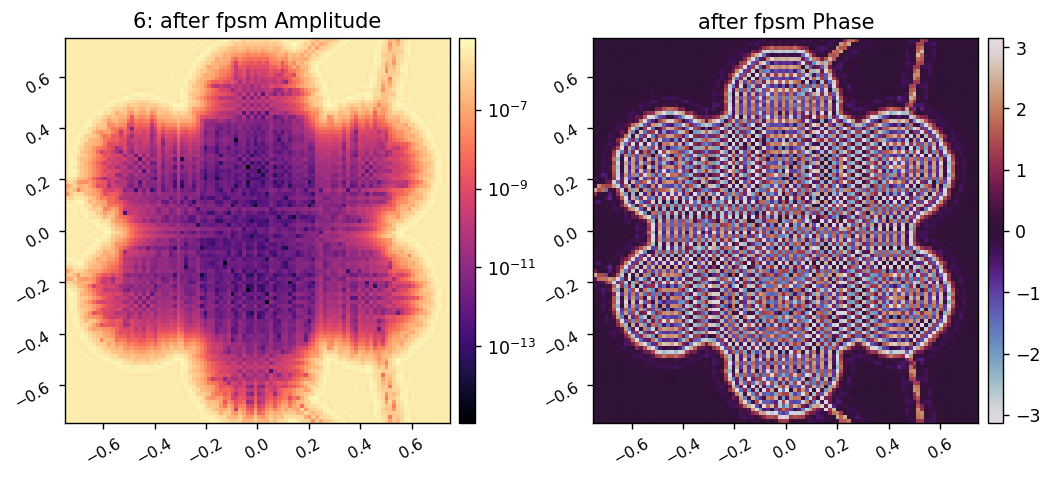

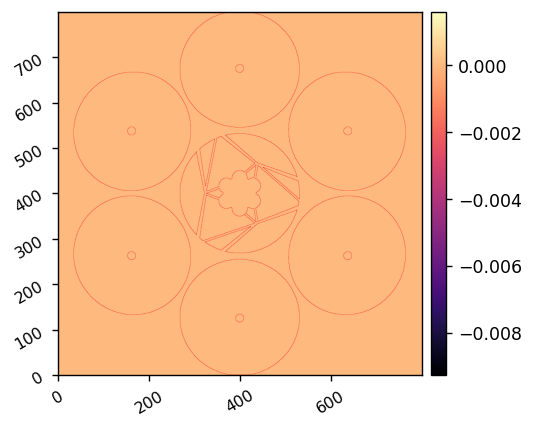

In [18]:
for i,wf in enumerate(wfs[31:]):
    if 'fp' in wf.location:
        print(f'Correction distance: {(wf.z_w0 - wf.z).to(u.mm):.8f}')
        npix=100
        imshow2(wf.intensity, wf.phase, f'{i:d}: ' + wf.location + ' Amplitude', wf.location+' Phase',
                lognorm1=True,
                cmap2='twilight',
                npix=npix, pxscl=wf.pixelscale.to(u.mm/u.pix)
                )
    elif 'pp' in wf.location:
        diam = wf.pixelscale.to(u.mm/u.pix) * model.npix*u.pix
        print(f'Pupil Diameter: {diam}')
        imshow2(wf.amplitude, wf.phase, f'{i:d}: ' + wf.location + ' Amplitude', wf.location+' Phase',
                cmap2='twilight',
                npix=model.npix, pxscl=wf.pixelscale.to(u.mm/u.pix),
                vmin2=-0.1, vmax2=0.1, 
                )
    else:
        imshow2(wf.amplitude, wf.phase, f'{i:d}: ' + wf.location+' Amplitude', wf.location+' Phase',
                cmap2='twilight',
                npix=model.npix, pxscl=wf.pixelscale.to(u.mm/u.pix)
                )

fsm_index = 7
phs = utils.pad_or_crop(wfs[fsm_index].phase, model.npix)
imshow1(phs*model.pupil_mask)

In [19]:
1.272431900000000E+004*2

25448.638

In [22]:
display(optics.distances['fsm-pp_fm2'] + optics.distances['fm2_Roap2'])
display(optics.distances['Roap2_fm3'] + optics.distances['fm3_ifp14'])

<Quantity 230.87708641 mm>

<Quantity 223.95033089 mm>

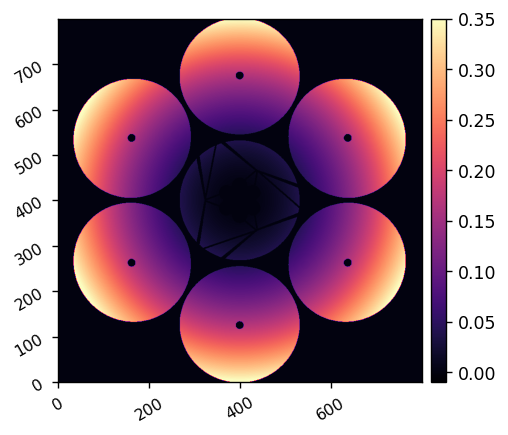

In [13]:
fsm_index = 7
phs = utils.pad_or_crop(wfs[fsm_index].phase, model.npix)
imshow1(phs*model.pupil_mask, vmin=-0.01, vmax=0.35)

In [14]:
i = 4
(wfs[i].z_w0 - wfs[i].z).to(u.mm)

<Quantity 0.01052102 mm>

In [15]:
wfs[7].param_str

'w_0:1.760e-05 m, z_w0=4.591e+01 m\nz=4.660e+01 m, z_r=1.498e-12 m2 / nm'

In [16]:
i = 7
(wfs[i].z_w0 - wfs[i].z).to(u.mm)

<Quantity -688.130945 mm>

In [17]:
(wfs[-1].z_w0 - wfs[-1].z).to(u.mm)

<Quantity 91.42257718 mm>